Ecommerse Clothes Sales:

- Amazon sells clothes online. Customers come in to the store, have meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

- The company is trying to decide whether to focus their efforts on their mobile app experience or their website. Following is predict is analysis for this company

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset

In [2]:
data = pd.read_csv("Ecommerce Customers.txt")

In [3]:
# Display the first few rows to understand the data structure

data.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

# Step 2: Check for missing values

In [4]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

# Step 3: Descriptive statistics

In [5]:
data.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

# Step 4: Data preprocessing

In [6]:
# Drop non-numeric columns that are not useful for the regression model

data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
# Dropping Email, Address, Avatar as these are irrelevant to predictions

data = data.drop(columns=["Email", "Address", "Avatar"])

In [8]:
# Check the cleaned dataset

data.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [9]:
data.head()

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

# Step 5: Exploratory Data Analysis (EDA)

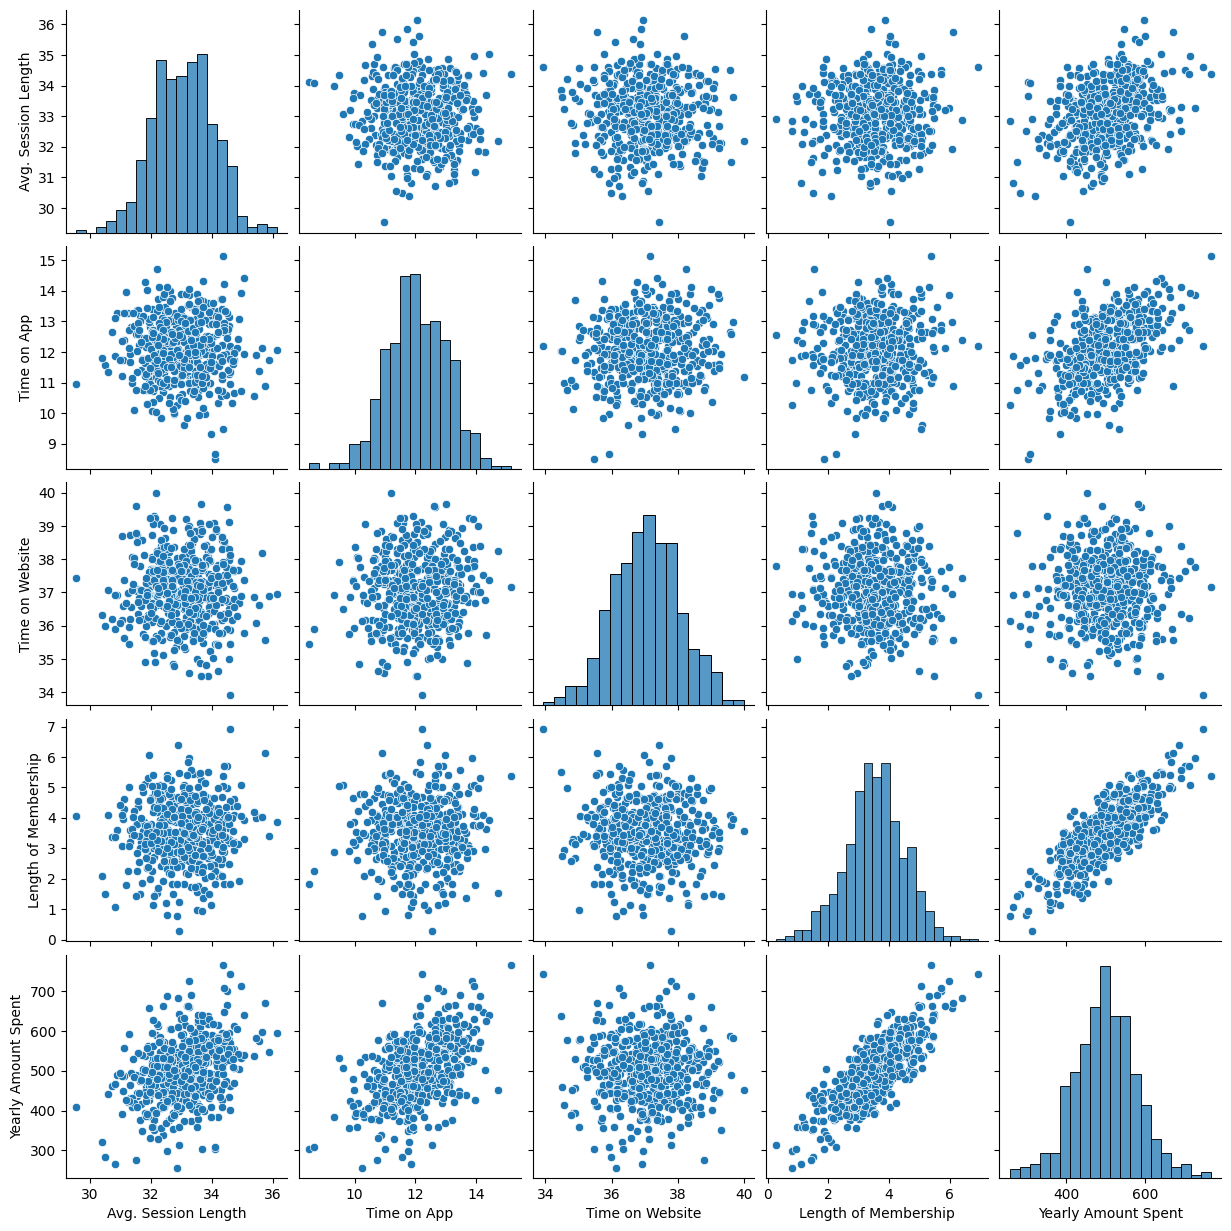

In [10]:
# Pairplot to visualize relationships between features

sns.pairplot(data)
plt.show()

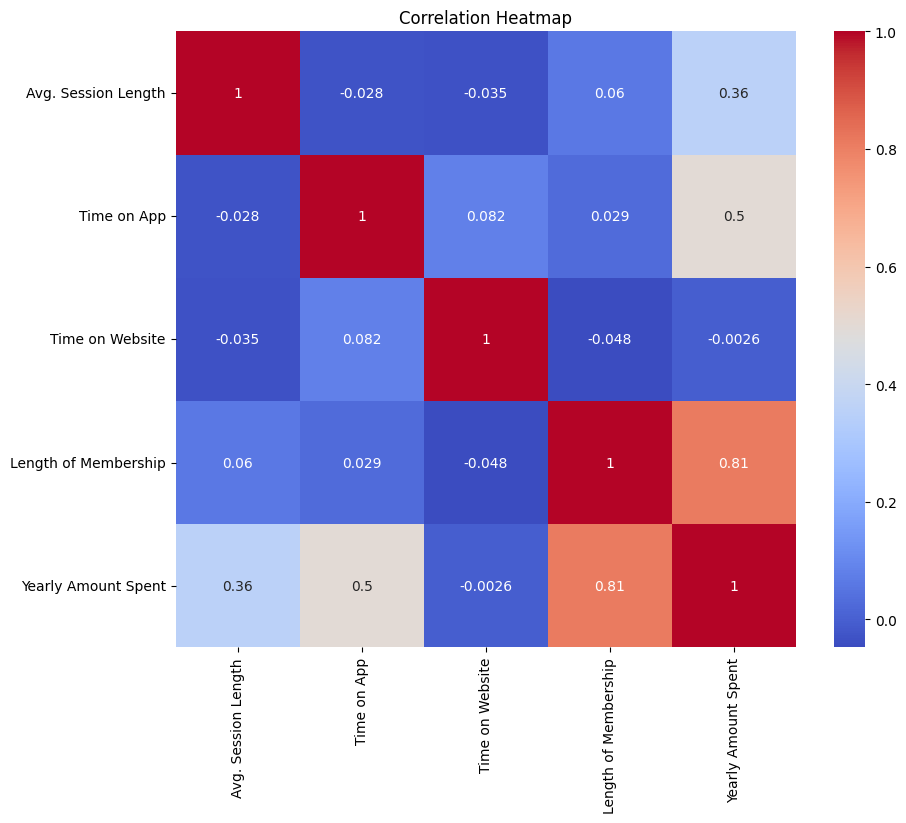

In [11]:
# Correlation Heatmap to understand relationships

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 6: Splitting the data into features and target variable

In [12]:
X = data.drop("Yearly Amount Spent", axis=1)  # Features

y = data["Yearly Amount Spent"]  # Target

# Step 7: Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (400, 4)
X_test shape: (100, 4)


# Step 8: Model Training

In [15]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Display model coefficients and intercept
print("\nModel Coefficients:")
print(model.coef_)
print("Model Intercept:")
print(model.intercept_)


Model Coefficients:
[25.5962591  38.78534598  0.31038593 61.89682859]
Model Intercept:
-1044.2574146365562


# Step 9: Predictions on the Test Set

In [17]:
y_pred = model.predict(X_test)

# Step 10: Model Evaluation

In [18]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

In [19]:
print("\nModel Evaluation:")

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Model Evaluation:
Mean Squared Error: 109.86374118393982
R-squared: 0.9778130629184127


# Step 11: Visualizing Predictions

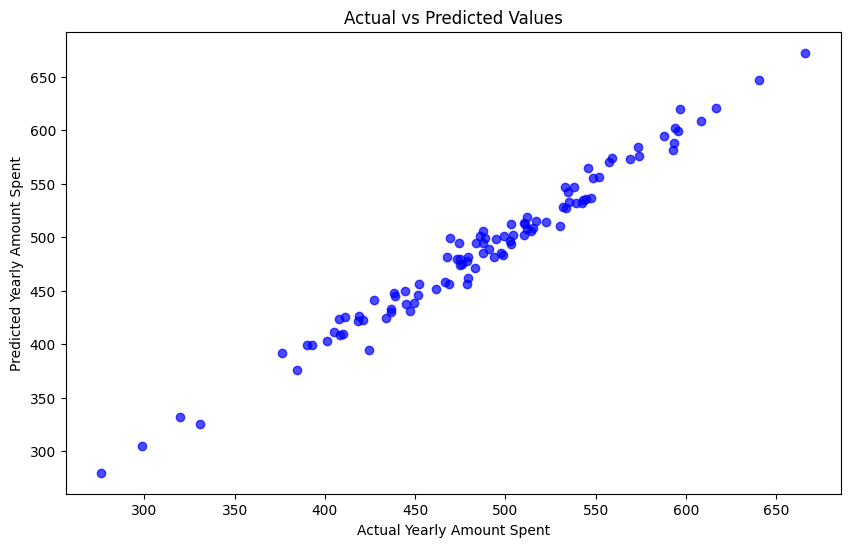

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted Yearly Amount Spent")
plt.title("Actual vs Predicted Values")
plt.show()

In [21]:
!pip install joblib


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# Optional: Save the model for future use

import joblib
joblib.dump(model, "linear_regression_model.pkl")
print("\nModel saved as 'linear_regression_model.pkl'")


Model saved as 'linear_regression_model.pkl'


# Step 12: User Input for Prediction

In [23]:
def predict_user_input():
    print("\nEnter the following details for prediction:")
    avg_session_length = float(input("Average Session Length: "))
    time_on_app = float(input("Time on App: "))
    time_on_website = float(input("Time on Website: "))
    length_of_membership = float(input("Length of Membership: "))

    # Create a DataFrame for the input
    user_data = pd.DataFrame({
        'Avg. Session Length': [avg_session_length],
        'Time on App': [time_on_app],
        'Time on Website': [time_on_website],
        'Length of Membership': [length_of_membership]
    })

    # Load the saved model and predict
    loaded_model = joblib.load("linear_regression_model.pkl")
    prediction = loaded_model.predict(user_data)
    print(f"\nPredicted Yearly Amount Spent: ${prediction[0]:.2f}")

In [24]:
predict_user_input()


Enter the following details for prediction:


Average Session Length:  44
Time on App:  22
Time on Website:  22
Length of Membership:  1



Predicted Yearly Amount Spent: $1003.98


Case Study

Link: https://www.kaggle.com/code/ashydv/media-company-case-study-linear-regression